# Calculate structure distance matrices

Author: Shawn Shen\
Created on: July 2022

In [1]:
from src.SupertypeTools import CGCalcMat, dist_heatmap, correlation, crop_mtx, triangle2square
import pandas as pd
import seaborn as sn

## 1. Intra-locus structure distance between reference panel alleles

In [3]:
# Residue similarity matrix
SimMtx = "Grantham" # choose from ["Grantham", "SM_THREAD_NORM", "PMBEC"]

# Shape parameters
sigma = 0.3
k = 1

# Peptide binding speficity distances predicted by NetMHCpan4.1
BA_Mat_all = pd.read_csv("Computed_DistMtx/top10_matrix.csv", index_col=0)
BA_Mat_all = triangle2square(BA_Mat_all)

### 1.1 HLA-A

HLA-A structure distance matrix


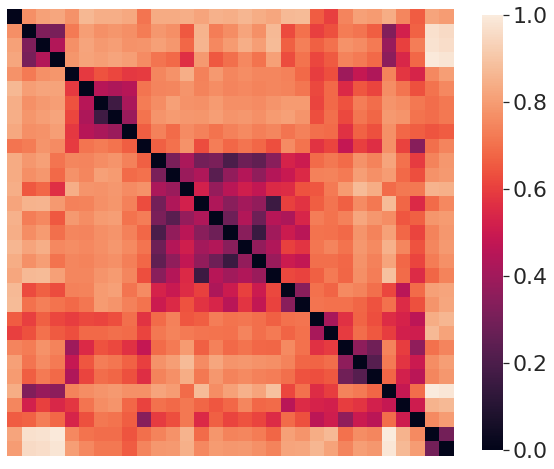

HLA-A peptide binding specificity distance matrix


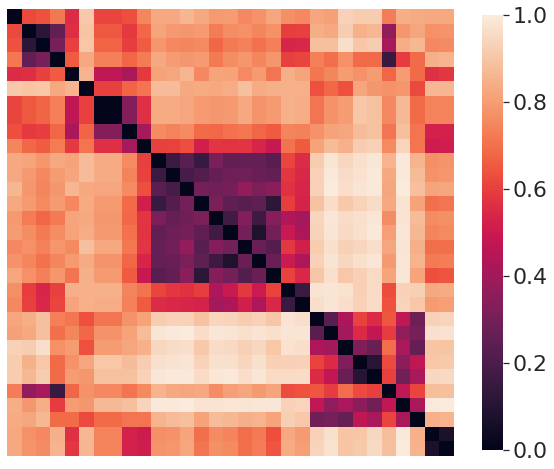

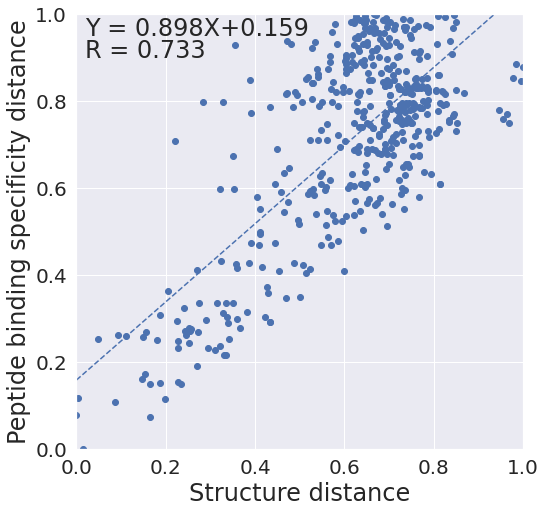

(0.8983555410265505, 0.15930966995138485, 0.7331932213823004)

In [4]:
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]

AMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-A.list", sigma=sigma, k=k, Standardize=True, DistMat_output="Computed_DistMtx/refpnl_A.csv")
AMat = triangle2square(AMat)

print("HLA-A structure distance matrix")
sn.set(font_scale=2)
dist_heatmap(AMat, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-A peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
correlation(crop_mtx(AMat, A_order, flatten=True), crop_mtx(BA_Mat_all, A_order, flatten=True))

### 1.2 HLA-B

HLA-B structure distance matrix


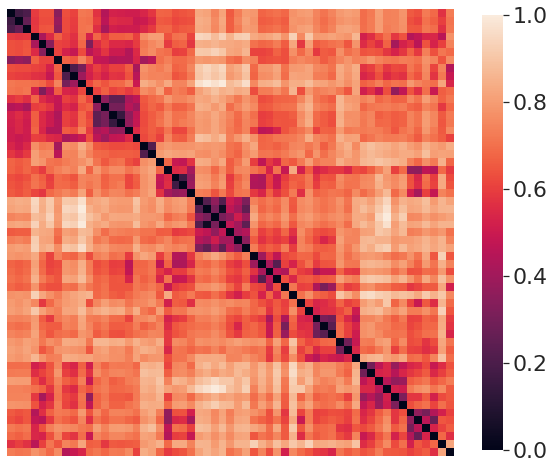

HLA-B peptide binding specificity distance matrix


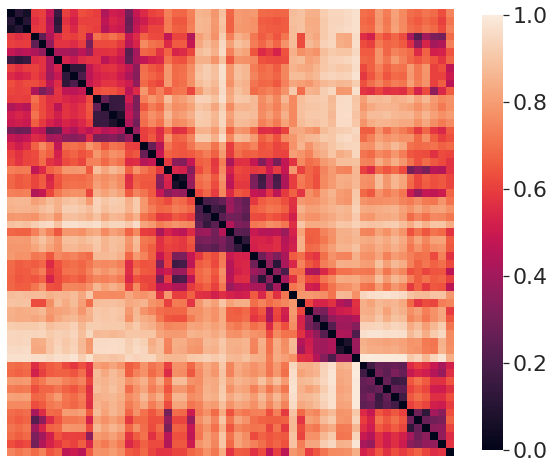

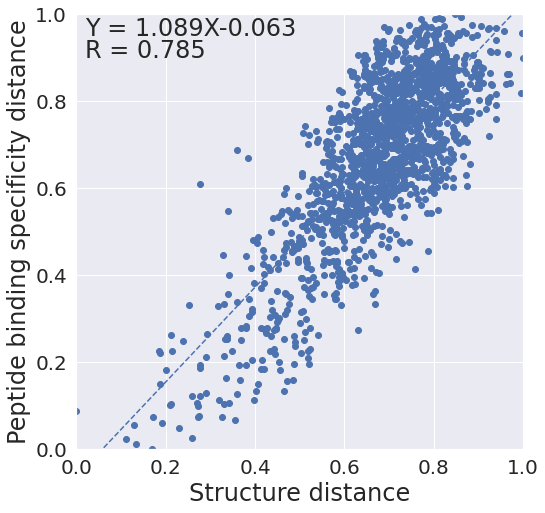

(1.0888938932960561, -0.06296139682971635, 0.7850926615660562)

In [5]:
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]

BMat = CGCalcMat("HLA1_models/CG_DAT",SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-B.list", sigma=sigma, k=k, Standardize=True, DistMat_output="Computed_DistMtx/refpnl_B.csv")
BMat = triangle2square(BMat)
sn.set(font_scale=2)
print("HLA-B structure distance matrix")
dist_heatmap(BMat, order=B_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-B peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=B_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

correlation(crop_mtx(BMat, B_order, flatten=True), crop_mtx(BA_Mat_all, B_order, flatten=True))

### 1.3 HLA-C

HLA-C structure distance matrix


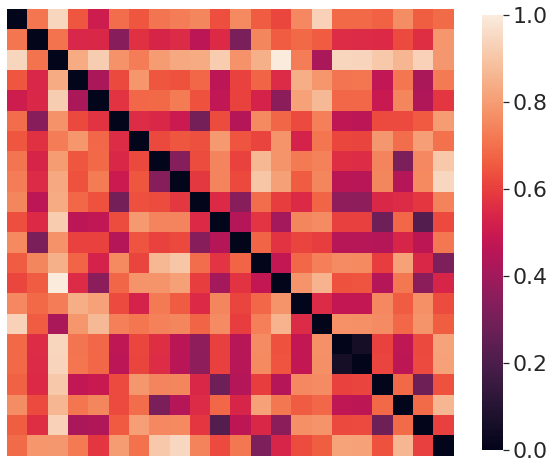

HLA-C peptide binding specificity distance matrix


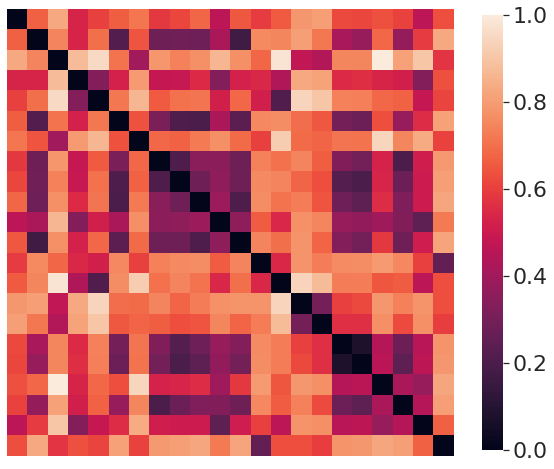

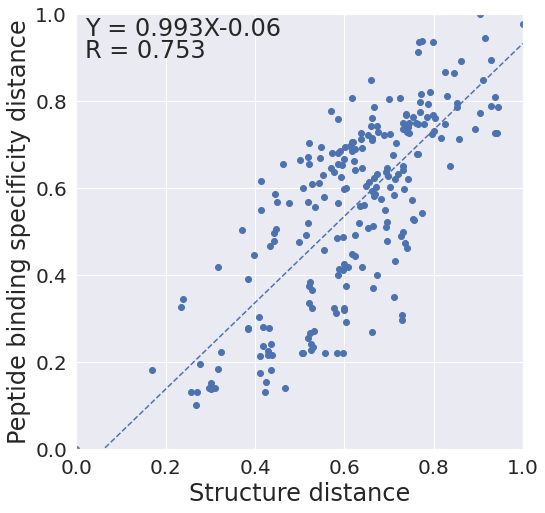

(0.9931947030765526, -0.060140719484254146, 0.7528803758538012)

In [6]:
C_order = [
    ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]

CMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-C.list", sigma=sigma, k=k, Standardize=True, DistMat_output="Computed_DistMtx/refpnl_C.csv")
CMat = triangle2square(CMat)
sn.set(font_scale=2)
print("HLA-C structure distance matrix")
dist_heatmap(CMat, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-C peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

correlation(crop_mtx(CMat, C_order, flatten=True), crop_mtx(BA_Mat_all, C_order, flatten=True))

## 2. Distance matrix of all populated HLA class I alleles

Alleles with frequncy > 0.01 in any population with more than 50 samples\
In total of 449 alleles

In [7]:
Mat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/All_alleles.list",sigma=sigma, k=k, DistMat_output="Computed_DistMtx/HLA-I.csv")
dist_heatmap(Mat, size=(40,40), shrink=0.8, aspect=40, pad=0.02, label=True)